In [1]:
import glob, os
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
def get_precision_recall(A, B):
    retrieved_list = A['opcs'].drop_duplicates()
    target_list = B['opcs'].str.replace('.','').drop_duplicates()
    
    total_codes_retrieved = len(retrieved_list)
    target_codes_retrieved = sum(retrieved_list.isin(target_list))
    total_target_codes = len(target_list)
    

    # precision = relevant retrieved instances / all retrieved instances
    # 'how many of the retrieved codes were in CORECT-R'
    precision = ( target_codes_retrieved / total_codes_retrieved ) * 100
    print('   Precision: ',round(precision,2), '  ',target_codes_retrieved,' out of ',total_codes_retrieved,'codes retrieved were relevant')

    # recall = relevant retrieved instances / all relevant instances
    # 'how many of the CORECT-R codes were retrieved?'
    recall = ( target_codes_retrieved / total_target_codes ) * 100
    print('   Recall:    ',round(recall,2), '  ',target_codes_retrieved,' out of ',total_target_codes,' CORECT codes found')

    return precision, recall

In [3]:
# Get codelists to compare against
comparison_sets = [['appendix', 'hdruk/Appendicitis'], 
                   ['cataract', 'hdruk/Cataract'], 
                   ['glaucoma', 'hdruk/Glaucoma'],
                   ['colorectal','CORECT_dictionary'],
                   ['lung','lung_dictionary']
                   ]

recall_matrix    = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = range(0,4))
precision_matrix = pd.DataFrame(index=[i[0] for i in comparison_sets], columns = range(0,4))


In [4]:
os.getcwd()

'/Users/oweyer/Documents/ontologyFilter/src'

In [5]:


# Get source codelists

for s in comparison_sets:
    print('--- Comparing '+s[0]+' codelist against '+s[1]+' standard')
    files = sorted( list( glob.glob("codelists/output/query_"+s[0]+"*_opcs.csv") ) )
    print(files)

    try:
        benchmark_list = pd.read_csv('codelists/'+s[1]+".csv")

        if (s[1] == 'CORECT_dictionary'):
            benchmark_list = benchmark_list[ ~pd.isna(benchmark_list['CorectRMapping']) ]
            benchmark_list = benchmark_list[~benchmark_list['opcs'].str.startswith(('Z','Y')) ]

        i=0
        for f in files: 
            print(f)
            codelist = pd.read_csv(f)
            p, r = get_precision_recall(codelist, benchmark_list)

            precision_matrix.loc[s[0]][i] = round(p,2)
            recall_matrix.loc[s[0]][i] = round(r,2)

            i = i + 1

    except FileNotFoundError as e:
        print(e)
# Create matrix

--- Comparing appendix codelist against hdruk/Appendicitis standard
['codelists/output/query_appendix_0_opcs.csv', 'codelists/output/query_appendix_1_opcs.csv', 'codelists/output/query_appendix_2_opcs.csv', 'codelists/output/query_appendix_3_opcs.csv']
codelists/output/query_appendix_0_opcs.csv
   Precision:  3.33    11  out of  330 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_1_opcs.csv
   Precision:  5.19    11  out of  212 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_2_opcs.csv
   Precision:  20.37    11  out of  54 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
codelists/output/query_appendix_3_opcs.csv
   Precision:  25.0    11  out of  44 codes retrieved were relevant
   Recall:     78.57    11  out of  14  CORECT codes found
--- Comparing cataract codelist against hdruk/Cataract standard


   Precision:  0.41    19  out of  4593 codes retrieved were relevant
   Recall:     90.48    19  out of  21  CORECT codes found
codelists/output/query_glaucoma_2_opcs.csv
   Precision:  4.27    21  out of  492 codes retrieved were relevant
   Recall:     100.0    21  out of  21  CORECT codes found
codelists/output/query_glaucoma_3_opcs.csv
   Precision:  4.79    19  out of  397 codes retrieved were relevant
   Recall:     90.48    19  out of  21  CORECT codes found
--- Comparing colorectal codelist against CORECT_dictionary standard
['codelists/output/query_colorectal_0_opcs.csv', 'codelists/output/query_colorectal_1_opcs.csv', 'codelists/output/query_colorectal_2_opcs.csv', 'codelists/output/query_colorectal_3_opcs.csv']
codelists/output/query_colorectal_0_opcs.csv
   Precision:  21.86    169  out of  773 codes retrieved were relevant
   Recall:     86.22    169  out of  196  CORECT codes found
codelists/output/query_colorectal_1_opcs.csv
   Precision:  27.56    156  out of  566 code

In [6]:
display(precision_matrix)
display(recall_matrix)

,0,1,2,3
appendix,3.33,5.19,20.37,25.0
cataract,0.46,0.45,53.33,60.0
glaucoma,0.37,0.41,4.27,4.79
colorectal,21.86,27.56,23.15,30.54
lung,3.59,6.31,5.8,8.46


,0,1,2,3
appendix,78.57,78.57,78.57,78.57
cataract,100.0,84.38,100.0,84.38
glaucoma,100.0,90.48,100.0,90.48
colorectal,86.22,79.59,81.63,74.49
lung,73.68,73.68,63.16,57.89


<Axes: >

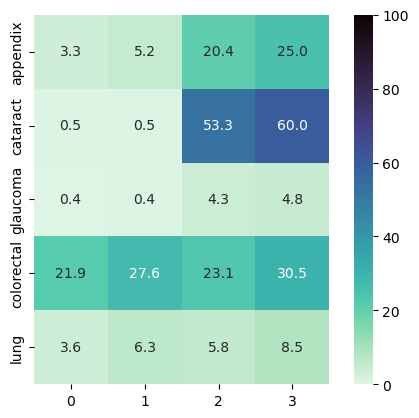

In [7]:
display( sns.heatmap(data=precision_matrix.astype(float), vmin=0, vmax=100, cmap='mako_r', square=True, annot=True, fmt=".1f") )

<Axes: >

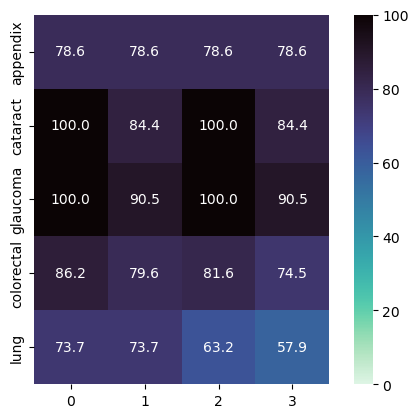

In [8]:
display( sns.heatmap(data=recall_matrix.astype(float), vmin=0, vmax=100, cmap='mako_r', square=True, annot=True, fmt=".1f") )